In [2]:
from utils.helpers import *
import keras
from keras import layers
from keras import models
from keras import optimizers
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline
keras.__version__

Using TensorFlow backend.


'2.1.3'

In [3]:
IMAGE_ID = 5
PADDING = 47

In [4]:
# Get only one image
image, mask = get_image_mask_from_id(IMAGE_ID)
image = image / 255.

# To show the image call imshow
imshow(image)

In [ ]:
# Add padding to image
# This step can be skipped because it's called in other method
# It's just for visualizing how padding is applied
padd_image = apply_padding(image, padding= PADDING)
padd_mask = apply_padding(mask, padding= PADDING)

In [5]:
# Get training input and labels from image
train, labels = get_train_and_labels_from_image_3_classes(image, mask, rate=0.5, padding=PADDING)
print(train.shape)
print(labels.shape)

(4535, 95, 95, 3)
(4535, 3)


In [6]:
# Split the train for cross validation
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train, labels, test_size = 0.2)
print("TRAIN : ", train_images.shape, train_labels.shape)
print("TEST  : ", test_images.shape, test_labels.shape)

TRAIN :  (3628, 95, 95, 3) (3628, 3)
TEST  :  (907, 95, 95, 3) (907, 3)


In [7]:
# Create a Convnet
# The architecture presented intends to replicate the one described in this paper
# http://www.sbrt.org.br/sbrt2017/anais/1570355345.pdf

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(95, 95, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 91, 91, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         819456    
__________

In [8]:
# SGD for fitting the model
# Do not train on MAC or it will EXPLODE 
# The hyperparameters are according to the ones described on the paper

SGD = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9)

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
3628/3628 [==============================] - 74s 20ms/step - loss: 0.6033 - acc: 0.6667
Epoch 2/5
3628/3628 [==============================] - 74s 20ms/step - loss: 0.5029 - acc: 0.7351
Epoch 3/5
3628/3628 [==============================] - 73s 20ms/step - loss: 0.3988 - acc: 0.7793
Epoch 4/5
3628/3628 [==============================] - 73s 20ms/step - loss: 0.3155 - acc: 0.8188
Epoch 5/5
3628/3628 [==============================] - 74s 20ms/step - loss: 0.2104 - acc: 0.9324


In [10]:
# Check accuracy of model
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

907/907 [==============================] - 7s 8ms/step


0.96729144325855676

In [9]:
# For saving the model
model.save('state_3_classes.h5')

In [ ]:
# For loading the model
model = models.load_model("state_3_classes.h5")

In [11]:
# Get test cases from original image
# Might cause overload, careful
test = get_test_from_image(image, padding=PADDING)

In [12]:
# Predict using model
predictions = model.predict(test)

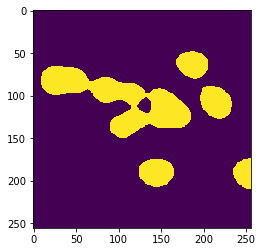

In [13]:
# Preparing to visualized predicted output
# Only valid for current model
# If model is changed, this method should change too

pred = []
for p in predictions:
    pred.append(np.argmax(p))
        
output = np.array(pred).reshape(image.shape[0], image.shape[1])
imshow(output)

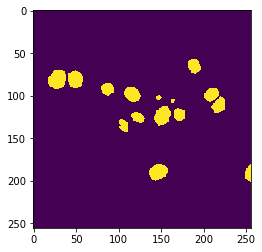

In [14]:
#new_mask = from_2_mask_to_3_mask(mask)
imshow(mask)